In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data_510.csv", sep=",")
long = data.set_index('Unnamed: 0').stack().to_frame().reset_index()\
           .rename(columns={'level_1': 'variable', 0: 'value'})
long = long.drop(["Unnamed: 0"], axis = 1)
data = data.drop(["Unnamed: 0"], axis = 1)

In [26]:
def MI(x,y,Nbins=21, plot=False):
    bins = np.linspace(np.min(x),np.max(x),Nbins)
    eps=np.spacing(1)
    x_marginal = np.histogram(x,bins=bins)[0]
    x_marginal = x_marginal/x_marginal.sum()
    y_marginal = np.array(np.histogram(y,bins=bins)[0])
    y_marginal = y_marginal/y_marginal.sum()
    xy_joint = np.array(np.histogram2d(x,y,bins=(bins,bins))[0])
    xy_joint = xy_joint/xy_joint.sum()
    MI=np.sum(xy_joint*np.log(xy_joint/(x_marginal[:,None]*y_marginal[None,:]+eps)+eps))
    if plot:
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(xy_joint.T,origin='lower')
        plt.title('joint')
        plt.subplot(1,2,2)
        plt.imshow((x_marginal[:,None]*y_marginal[None,:]).T,origin='lower')
        plt.title('product of marginals')
        plt.suptitle('Mutual information: %f'%MI)

    return(MI)
#MI(x,y)
#MI(np.random.rand(len(x))*2-1,np.random.rand(len(x))*2-1)

#xn=np.random.randn(len(x))
#yn=np.random.randn(len(x))
#yn1=xn+yn
#MI(xn,yn)
#MI(xn,yn1);

In [32]:
for node in data.keys():
    print(f"\n---{node}---")
    print(f"mean: {np.mean(data[node])}")
    print(f"std: {np.std(data[node])}")
    for node_2 in data.keys():
        a, b = np.array(data[node].tolist()), np.array(data[node_2].tolist())
        ab = np.stack((a,b))
        cov = np.corrcoef(ab)
        if node != node_2:
            print(f"corr with {node_2}: {cov[0,1]} \t MI {node} to {node_2}: {MI(data[node_2], data[node], Nbins=21)}")


---A---
mean: 1.3765394413711143
std: 1.8986537427850416
corr with B: -0.10144640302789483 	 MI A to B: 1.698445640935558
corr with C: 0.5204651714146851 	 MI A to C: 1.2692864705253466
corr with D: 0.8992934354859883 	 MI A to D: 1.1175577926148694

---B---
mean: 0.16267503613041234
std: 0.6111682236368067
corr with A: -0.10144640302789483 	 MI B to A: 0.26135420136433063
corr with C: -0.08037953995390523 	 MI B to C: 0.6871201913824939
corr with D: -0.3849599824480891 	 MI B to D: 0.3794201701668436

---C---
mean: 0.39185801595646763
std: 1.0666641262607672
corr with A: 0.5204651714146851 	 MI C to A: 0.6534714766899856
corr with B: -0.08037953995390522 	 MI C to B: 1.3265556921043573
corr with D: 0.4720957138214843 	 MI C to D: 0.7026833595960826

---D---
mean: 1.7838644052407013
std: 2.102160457276018
corr with A: 0.8992934354859883 	 MI D to A: 1.0775277553485632
corr with B: -0.3849599824480891 	 MI D to B: 2.100394439862293
corr with C: 0.4720957138214843 	 MI D to C: 1.3159680

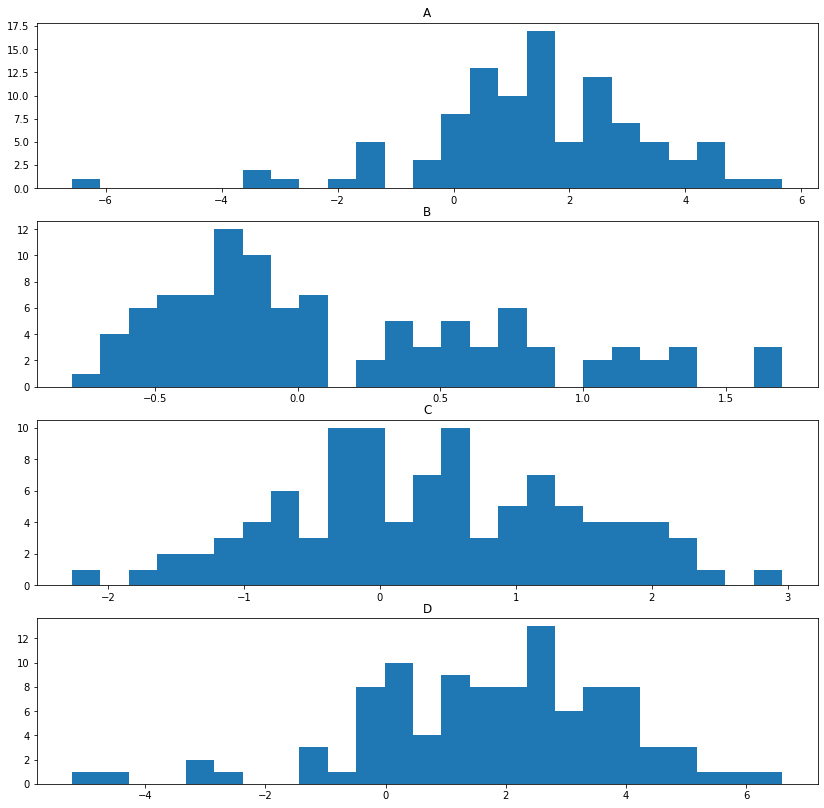

In [38]:
fig, axs = plt.subplots(4, figsize=(14,14))
for i, node in enumerate(data.keys()):
    axs[i].title.set_text(f"{node}")
    axs[i].hist(data[node], bins=25)
plt.show()